In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
# Load & Clean Data
df = pd.read_csv('2015-building-energy-benchmarking.csv')
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  \
0   MAYFLOWER PARK HOTEL                     659000030   
1        PARAMOUNT HOTEL                     659000220   
2           WESTIN HOTEL                     659000475   
3              HOTEL MAX                     659000640   
4  WARWICK SEATTLE HOTEL                     659000970   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
2  {'latitude': '47.61334897', 'longitude': '-122...                    7   
3  {'latitude': '47.61421585', 'longitude': '-122...                    7   
4  {'latitude': '47.6137544', 'longitude': '-122....                    7   

  Neighborhood  YearBuilt  ...  GHGEmissionsIntensitykgCO2eft2  DefaultData  \
0     DOWNTOWN       1927  ...                            2.64           No   
1     DOWNTOWN       1996  ...                            2.38           No   
2     DOWNTOWN       1969  ...                            1.92          Yes   
3     DOWNTOWN       1926  ...                           31.38           No   
4     DOWNTOWN       1980  ...                            4.02           No   

   Comment  ComplianceStatus       Outlier 2010CensusTracts  \
0      NaN         Compliant           NaN              NaN   
1      NaN         Compliant           NaN              NaN   
2      NaN         Compliant           NaN              NaN   
3      NaN         Compliant  High Outlier              NaN   
4      NaN         Compliant           NaN              NaN   

  SeattlePoliceDepartmentMicroCommunityPolicingPlanAreas  \
0                                               14.0       
1                                               14.0       
2                                               56.0       
3                                               56.0       
4                                               56.0       

   CityCouncilDistricts SPDBeats  ZipCodes  
0                   NaN     31.0     18081  
1                   NaN     31.0     18081  
2                   NaN     31.0     18081  
3                   NaN     31.0     18081  
4                   NaN     31.0     19576  

[5 rows x 47 columns]

In [87]:
columns_to_drop = ['OSEBuildingID', 'PropertyName', 'TaxParcelIdentificationNumber', 'Location','ListOfAllPropertyUseTypes', 'Comment', 'Outlier']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [88]:
df['DataYear'] = pd.to_numeric(df['DataYear'], errors='coerce')
df['YearBuilt'] = pd.to_numeric(df['YearBuilt'], errors='coerce')
df['NumberofFloors'] = pd.to_numeric(df['NumberofFloors'], errors='coerce')
df['BuildingAge'] = 2025 - df['YearBuilt']

In [89]:
df = df.dropna(subset=['BuildingAge', 'SiteEUIkBtusf', 'NumberofFloors'])

In [90]:
# Basic Statistics
print("\nüìä Basic Dataset Statistics:")
print("These basic stats give an overview of key numeric fields.")
print(df.describe())
print("\nüîé Insight: This table helps us understand ranges, averages, and potential data issues (like extreme outliers).")


üìä Basic Dataset Statistics:
These basic stats give an overview of key numeric fields.
       DataYear  CouncilDistrictCode    YearBuilt  NumberofBuildings  \
count    3322.0          3322.000000  3322.000000        3322.000000   
mean     2015.0             4.455750  1967.676099           1.031306   
std         0.0             2.128229    32.969156           0.764057   
min      2015.0             1.000000  1900.000000           1.000000   
25%      2015.0             3.000000  1947.000000           1.000000   
50%      2015.0             4.000000  1974.000000           1.000000   
75%      2015.0             7.000000  1996.000000           1.000000   
max      2015.0             7.000000  2015.000000          39.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     3322.000000      3.322000e+03         3322.000000   
mean         4.690247      9.075498e+04        11112.081577   
std          5.464409      1.494017e+05        35382.866817   
min      

In [111]:
# Cleaned dataset
print("Cleaned Dataset")
df.head()

Cleaned Dataset


DataYear    BuildingType PrimaryPropertyType  CouncilDistrictCode  \
0      2015  NonResidential               Hotel                    7   
1      2015  NonResidential               Hotel                    7   
2      2015  NonResidential               Hotel                    7   
3      2015  NonResidential               Hotel                    7   
4      2015  NonResidential               Hotel                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   
2     DOWNTOWN       1969                  1            41.0   
3     DOWNTOWN       1926                  1            10.0   
4     DOWNTOWN       1980                  1            18.0   

   PropertyGFATotal  PropertyGFAParking  ...  GHGEmissionsIntensitykgCO2eft2  \
0             88434                   0  ...                            2.64   
1            103566               15064  ...                            2.38   
2            961990                   0  ...                            1.92   
3             61320                   0  ...                           31.38   
4            119890               12460  ...                            4.02   

  DefaultData  ComplianceStatus 2010CensusTracts  \
0          No         Compliant              NaN   
1          No         Compliant              NaN   
2         Yes         Compliant              NaN   
3          No         Compliant              NaN   
4          No         Compliant              NaN   

   SeattlePoliceDepartmentMicroCommunityPolicingPlanAreas  \
0                                               14.0        
1                                               14.0        
2                                               56.0        
3                                               56.0        
4                                               56.0        

  CityCouncilDistricts  SPDBeats ZipCodes  BuildingAge  anomaly  
0                  NaN      31.0    18081           98   Normal  
1                  NaN      31.0    18081           29   Normal  
2                  NaN      31.0    18081           56   Normal  
3                  NaN      31.0    18081           99  Anomaly  
4                  NaN      31.0    19576           45   Normal  

[5 rows x 42 columns]


üìà Distribution of Energy Intensity (EUI)


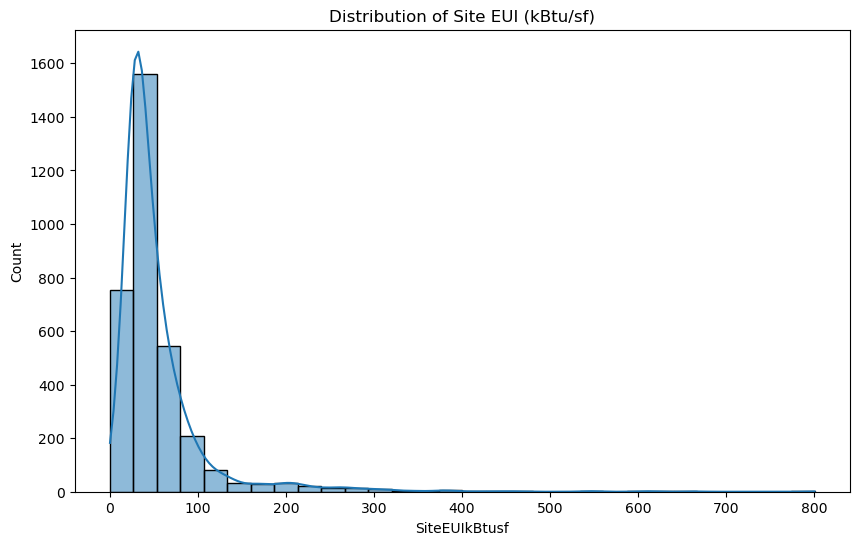


üîé Insight: This plot shows most buildings have moderate energy intensity, but some extreme outliers exist ‚Äî we‚Äôll need to address that later.


In [92]:
# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['SiteEUIkBtusf'], bins=30, kde=True)
plt.title('Distribution of Site EUI (kBtu/sf)')
print("\nüìà Distribution of Energy Intensity (EUI)")
plt.show()
print("\nüîé Insight: This plot shows most buildings have moderate energy intensity, but some extreme outliers exist ‚Äî we‚Äôll need to address that later.")

In [93]:
# # Correlation Heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap')
# print("\nüìå Correlation Heatmap")
# plt.show()
# print("\nüîé Insight: This heatmap highlights relationships between variables. For example, we can see how building age, floors, and size correlate with energy use ‚Äî crucial for selecting model features.")

In [94]:
# Anomaly Detection (Z-score Method)
df['z_score'] = stats.zscore(df['SiteEUIkBtusf'])
df['anomaly'] = df['z_score'].apply(lambda x: 'Anomaly' if abs(x) > 3 else 'Normal')


üö® Anomalies in Energy Use:


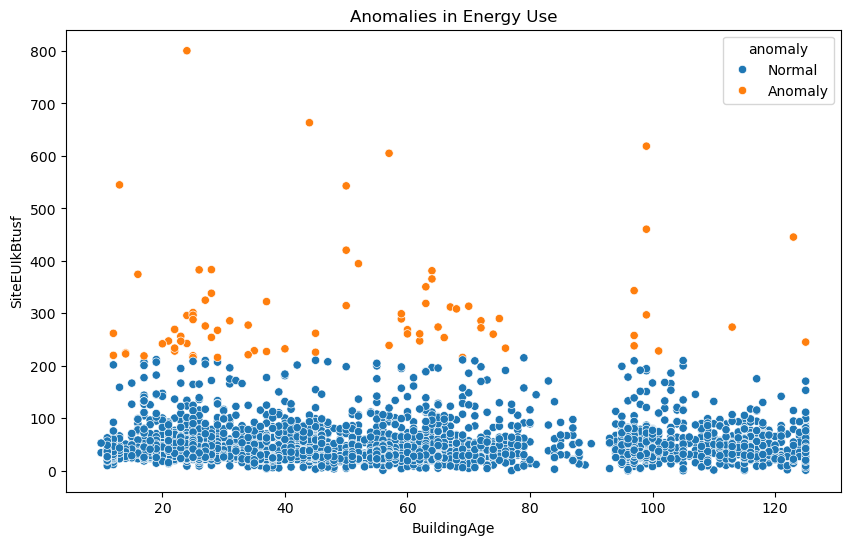


üîé Insight: This scatterplot highlights buildings with unusual energy use. Spotting these helps detect errors or operational inefficiencies for targeted investigation.


In [95]:
print("\nüö® Anomalies in Energy Use:")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['BuildingAge'], y=df['SiteEUIkBtusf'], hue=df['anomaly'])
plt.title('Anomalies in Energy Use')
plt.show()
print("\nüîé Insight: This scatterplot highlights buildings with unusual energy use. Spotting these helps detect errors or operational inefficiencies for targeted investigation.")

In [96]:
df.drop(columns=['z_score'], inplace=True)

In [97]:
# Trend Analysis
yearly_trend = df.groupby('DataYear')['SiteEUIkBtusf'].mean().reset_index()

In [98]:
# Correlation Analysis
correlations = df.corr(numeric_only=True)['SiteEUIkBtusf'].sort_values(ascending=False)

In [99]:
print("\nüîó Top Correlations with Energy Intensity:")
print(correlations)
print("\nüîé Insight: These correlations show which factors (like size, age, floors) have the strongest influence on energy use. These are our priority features for prediction models and efficiency programs.")



üîó Top Correlations with Energy Intensity:
SiteEUIkBtusf                                             1.000000
SiteEUIWNkBtusf                                           0.995961
SourceEUIWNkBtusf                                         0.953006
SourceEUIkBtusf                                           0.950739
GHGEmissionsIntensitykgCO2eft2                            0.721175
SiteEnergyUseWNkBtu                                       0.451656
SiteEnergyUsekBtu                                         0.451310
ElectricitykBtu                                           0.440151
ElectricitykWh                                            0.440151
GHGEmissionsMetricTonsCO2e                                0.360453
NaturalGaskBtu                                            0.348101
NaturalGastherms                                          0.348101
SteamUsekBtu                                              0.136934
PropertyGFATotal                                          0.107163
PropertyGFABuild

In [100]:
# Cluster Analysis
cluster_data = df[['SiteEUIkBtusf', 'BuildingAge', 'NumberofFloors']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

In [101]:
# Using K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_data['Cluster'] = kmeans.fit_predict(scaled_data)


üè¢ Building Clusters by Energy Behavior:


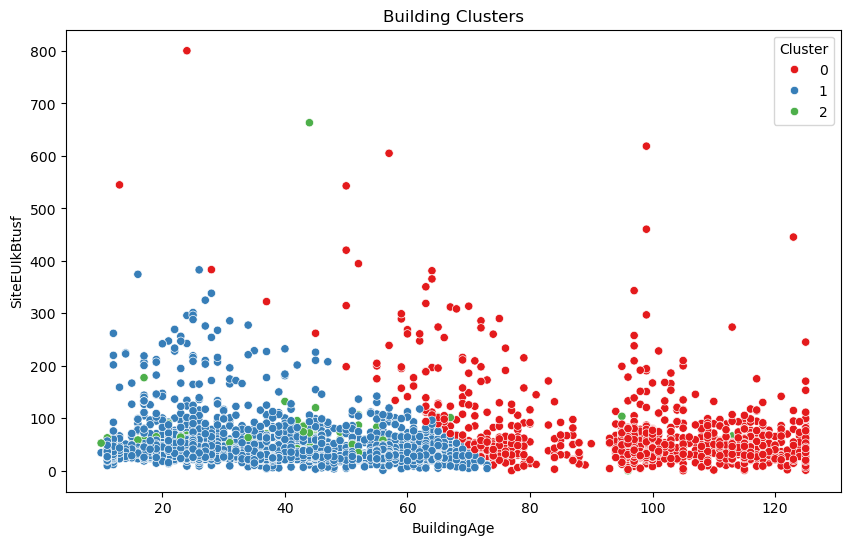


üîé Insight: Clustering groups buildings with similar age and energy behavior. Each group could need different management strategies, like retrofits for older buildings or monitoring newer ones.


In [102]:
print("\nüè¢ Building Clusters by Energy Behavior:")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cluster_data['BuildingAge'], y=cluster_data['SiteEUIkBtusf'], hue=cluster_data['Cluster'], palette='Set1')
plt.title('Building Clusters')
plt.show()
print("\nüîé Insight: Clustering groups buildings with similar age and energy behavior. Each group could need different management strategies, like retrofits for older buildings or monitoring newer ones.")

In [103]:
# Predictive Model - Linear Regression
features = ['BuildingAge', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFABuildings']
X = df[features].fillna(0)
y = df['SiteEUIkBtusf']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [106]:
print("\nü§ñ Predicting Energy Usage - Model Performance:")
print(f"RMSE (Root Mean Squared Error): {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"R2 Score (Model Fit Quality): {r2_score(y_test, y_pred)}:.2f")
print("\nüîé Insight: RMSE measures average prediction error (lower is better), and R2 shows how well our model fits the data (closer to 1 is ideal). This gives us a sense of how reliable our predictions are.")


ü§ñ Predicting Energy Usage - Model Performance:
RMSE (Root Mean Squared Error): 56.70
R2 Score (Model Fit Quality): 0.001989752372482667:.2f

üîé Insight: RMSE measures average prediction error (lower is better), and R2 shows how well our model fits the data (closer to 1 is ideal). This gives us a sense of how reliable our predictions are.


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [107]:
# Recommendations
print("\nüìö Recommendations for Energy Efficiency:")
print("üîé Based on all our analysis, here‚Äôs how building managers can act:")
print("""
1Ô∏è‚É£ Focus retrofitting efforts on older buildings (higher energy intensity).
2Ô∏è‚É£ Encourage taller buildings where feasible ‚Äî more floors tend to be more efficient.
3Ô∏è‚É£ Investigate anomalies ‚Äî these buildings might have maintenance issues or data errors.
4Ô∏è‚É£ Use this model to forecast energy needs during building design and renovation.
5Ô∏è‚É£ For future improvements, add weather and occupancy data to refine predictions.
6Ô∏è‚É£ Adopt smart building tech for real-time energy optimization.
7Ô∏è‚É£ Customize strategies for each building cluster (older, high-use, low-use, etc.).
8Ô∏è‚É£ Set energy reduction targets for the worst-performing clusters.
""")
print("\n‚úÖ Conclusion: Combining data analysis, clustering, prediction, and anomaly detection gives building managers a full toolkit to reduce energy waste and improve sustainability.")



üìö Recommendations for Energy Efficiency:
üîé Based on all our analysis, here‚Äôs how building managers can act:

1Ô∏è‚É£ Focus retrofitting efforts on older buildings (higher energy intensity).
2Ô∏è‚É£ Encourage taller buildings where feasible ‚Äî more floors tend to be more efficient.
3Ô∏è‚É£ Investigate anomalies ‚Äî these buildings might have maintenance issues or data errors.
4Ô∏è‚É£ Use this model to forecast energy needs during building design and renovation.
5Ô∏è‚É£ For future improvements, add weather and occupancy data to refine predictions.
6Ô∏è‚É£ Adopt smart building tech for real-time energy optimization.
7Ô∏è‚É£ Customize strategies for each building cluster (older, high-use, low-use, etc.).
8Ô∏è‚É£ Set energy reduction targets for the worst-performing clusters.


‚úÖ Conclusion: Combining data analysis, clustering, prediction, and anomaly detection gives building managers a full toolkit to reduce energy waste and improve sustainability.
